In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip3 install torch torchvision torchaudio

In [1]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb

--2023-12-03 14:49:56--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4332 (4.2K) [application/x-deb]
Saving to: ‘cuda-keyring_1.1-1_all.deb’

cuda-keyring_1.1-1_ 100%[===================>]   4.23K  --.-KB/s    in 0s      

2023-12-03 14:49:56 (185 MB/s) - ‘cuda-keyring_1.1-1_all.deb’ saved [4332/4332]



In [2]:
!sudo dpkg -i cuda-keyring_1.1-1_all.deb

(Reading database ... 114840 files and directories currently installed.)
Preparing to unpack cuda-keyring_1.1-1_all.deb ...
Unpacking cuda-keyring (1.1-1) over (1.1-1) ...
Setting up cuda-keyring (1.1-1) ...


In [3]:
!sudo apt-get update

Get:1 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:2 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Hit:4 http://packages.cloud.google.com/apt gcsfuse-focal InRelease             
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]        
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:7 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [553 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]      
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]      
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [632 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1520 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 P

In [4]:
!sudo apt-get -y install cuda-toolkit-12-3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-toolkit-12-2-config-common libcublas-12-2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  cuda-cccl-12-3 cuda-command-line-tools-12-3 cuda-compiler-12-3 cuda-crt-12-3
  cuda-cudart-12-3 cuda-cudart-dev-12-3 cuda-cuobjdump-12-3 cuda-cupti-12-3
  cuda-cupti-dev-12-3 cuda-cuxxfilt-12-3 cuda-documentation-12-3
  cuda-driver-dev-12-3 cuda-gdb-12-3 cuda-libraries-12-3
  cuda-libraries-dev-12-3 cuda-nsight-12-3 cuda-nsight-compute-12-3
  cuda-nsight-systems-12-3 cuda-nvcc-12-3 cuda-nvdisasm-12-3
  cuda-nvml-dev-12-3 cuda-nvprof-12-3 cuda-nvprune-12-3 cuda-nvrtc-12-3
  cuda-nvrtc-dev-12-3 cuda-nvtx-12-3 cuda-nvvm-12-3 cuda-nvvp-12-3
  cuda-opencl-12-3 cuda-opencl-dev-12-3 cuda-profiler-api-12-3
  cuda-sanitizer-12-3 cuda-toolkit-12-3-config-common cuda-tools-12-3
 

In [5]:
import torch
torch.cuda.is_available()

True

In [6]:
#build with MONAI C++/CUDA extensions:
!BUILD_MONAI=1 pip install --no-build-isolation git+https://github.com/Project-MONAI/MONAI#egg=monai

  Cloning https://github.com/Project-MONAI/MONAI to /tmp/pip-install-xd9zt_s6/monai_6f09114f36ac4ed6a841fa5bb2cb1802
  Running command git clone --filter=blob:none --quiet https://github.com/Project-MONAI/MONAI /tmp/pip-install-xd9zt_s6/monai_6f09114f36ac4ed6a841fa5bb2cb1802
  Resolved https://github.com/Project-MONAI/MONAI to commit 962aa3cd32c2444affbb75e7c1bc0a1763d85bc3
  Preparing metadata (pyproject.toml) ... done
  Created wheel for monai: filename=monai-1.3.0+39.g962aa3cd-cp310-cp310-linux_x86_64.whl size=10369318 sha256=fc96719737b53f8dcdaf2edd51a5c76f28d5d2e18016105a413bf5256ff673d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-irnd92fq/wheels/ae/df/85/e1529c65c7b6d24f94fb29018f2e6a19809d416ee64044d71f
Successfully built monai


In [7]:
#Validating the install
!python -c "import monai; monai.config.print_config()"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
MONAI version: 1.3.0+39.g962aa3cd
Numpy version: 1.24.3
Pytorch version: 2.0.0
MONAI flags: HAS_EXT = True, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 962aa3cd32c2444affbb75e7c1bc0a1763d85bc3
MONAI __file__: /opt/conda/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.13
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.21.0
scipy version: 1.7.3
Pillow version: 9.5.0
Tensorboard version: 2.13.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.15.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.3
pandas version: 2.1.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
tran

In [8]:
#install MONAI Generative Models
!git clone https://github.com/Project-MONAI/GenerativeModels.git

Cloning into 'GenerativeModels'...
remote: Enumerating objects: 3660, done.
remote: Counting objects: 100% (1104/1104), done.
remote: Compressing objects: 100% (531/531), done.
remote: Total 3660 (delta 775), reused 775 (delta 569), pack-reused 2556
Receiving objects: 100% (3660/3660), 21.31 MiB | 12.26 MiB/s, done.
Resolving deltas: 100% (2174/2174), done.


In [9]:
!wget https://github.com/Project-MONAI/MONAI/blob/dev/setup.py

--2023-12-03 15:03:55--  https://github.com/Project-MONAI/MONAI/blob/dev/setup.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34376 (34K) [text/plain]
Saving to: ‘setup.py’

setup.py            100%[===================>]  33.57K  --.-KB/s    in 0.01s   

2023-12-03 15:03:55 (2.73 MB/s) - ‘setup.py’ saved [34376/34376]



In [10]:
!cd GenerativeModels/
!python setup.py install

Traceback (most recent call last):
  File "/kaggle/working/setup.py", line 1, in <module>
    {"payload":{"allShortcutsEnabled":false,"fileTree":{"":{"items":[{"name":".github","path":".github","contentType":"directory"},{"name":"docs","path":"docs","contentType":"directory"},{"name":"monai","path":"monai","contentType":"directory"},{"name":"tests","path":"tests","contentType":"directory"},{"name":".clang-format","path":".clang-format","contentType":"file"},{"name":".deepsource.toml","path":".deepsource.toml","contentType":"file"},{"name":".dockerignore","path":".dockerignore","contentType":"file"},{"name":".gitattributes","path":".gitattributes","contentType":"file"},{"name":".gitignore","path":".gitignore","contentType":"file"},{"name":".pre-commit-config.yaml","path":".pre-commit-config.yaml","contentType":"file"},{"name":".readthedocs.yml","path":".readthedocs.yml","contentType":"file"},{"name":"CHANGELOG.md","path":"CHANGELOG.md","contentType":"file"},{"name":"CITATION.cff","path"

In [11]:
!pip install lpips
!pip install monai-generative==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.8 MB/s eta 0:00:00
  Obtaining dependency information for monai-generative==0.2.2 from https://files.pythonhosted.org/packages/be/7d/eb5b5f9813646f3864f93c61b29550f3a14b06383b79f2f327cc71540cae/monai_generative-0.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 4.4 MB/s eta 0:00:00


In [12]:
#Set up environment
!python -c "import monai" || pip install -q "monai-weekly[tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
#Setup imports
import os
import shutil
import tempfile

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from monai import transforms
from monai.apps import MedNISTDataset
from monai.config import print_config
from monai.data import DataLoader, Dataset
from monai.utils import first, set_determinism
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

from generative.inferers import LatentDiffusionInferer
from generative.losses.adversarial_loss import PatchAdversarialLoss
from generative.losses.perceptual import PerceptualLoss
from generative.networks.nets import AutoencoderKL, DiffusionModelUNet, PatchDiscriminator
from generative.networks.schedulers import DDPMScheduler

print_config()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


MONAI version: 1.3.0+39.g962aa3cd
Numpy version: 1.24.3
Pytorch version: 2.0.0
MONAI flags: HAS_EXT = True, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 962aa3cd32c2444affbb75e7c1bc0a1763d85bc3
MONAI __file__: /opt/conda/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.13
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.21.0
scipy version: 1.7.3
Pillow version: 9.5.0
Tensorboard version: 2.13.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.15.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.3
pandas version: 2.1.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: 4.35.0
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
   

In [14]:
#Set deterministic training for reproducibility
set_determinism(42)

In [15]:
#Setup a data directory and download dataset
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)

/tmp/tmpu66dt4fv


In [16]:
#Prepare training set data loader
train_data = MedNISTDataset(root_dir=root_dir, section="training", download=True, seed=0)
train_datalist = [{"image": item["image"]} for item in train_data.data if item["class_name"] == "Hand"]
image_size = 64
train_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.ScaleIntensityRanged(keys=["image"], a_min=0.0, a_max=255.0, b_min=0.0, b_max=1.0, clip=True),
        transforms.RandAffined(
            keys=["image"],
            rotate_range=[(-np.pi / 36, np.pi / 36), (-np.pi / 36, np.pi / 36)],
            translate_range=[(-1, 1), (-1, 1)],
            scale_range=[(-0.05, 0.05), (-0.05, 0.05)],
            spatial_size=[image_size, image_size],
            padding_mode="zeros",
            prob=0.5,
        ),
    ]
)
train_ds = Dataset(data=train_datalist, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4, persistent_workers=True)

MedNIST.tar.gz: 59.0MB [00:00, 129MB/s]                             

2023-12-03 15:05:55,333 - INFO - Downloaded: /tmp/tmpu66dt4fv/MedNIST.tar.gz


2023-12-03 15:05:55,443 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-12-03 15:05:55,444 - INFO - Writing into directory: /tmp/tmpu66dt4fv.


Loading dataset: 100%|██████████| 47164/47164 [00:33<00:00, 1402.55it/s]


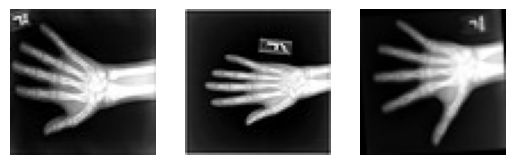

In [17]:
#Visualise examples from the training set
# Plot 3 examples from the training set
check_data = first(train_loader)
fig, ax = plt.subplots(nrows=1, ncols=3)
for image_n in range(3):
    ax[image_n].imshow(check_data["image"][image_n, 0, :, :], cmap="gray")
    ax[image_n].axis("off")

In [18]:
#Prepare validation set data loader
val_data = MedNISTDataset(root_dir=root_dir, section="validation", download=True, seed=0)
val_datalist = [{"image": item["image"]} for item in val_data.data if item["class_name"] == "Hand"]
val_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.ScaleIntensityRanged(keys=["image"], a_min=0.0, a_max=255.0, b_min=0.0, b_max=1.0, clip=True),
    ]
)
val_ds = Dataset(data=val_datalist, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=True, num_workers=4, persistent_workers=True)

2023-12-03 15:07:07,695 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-12-03 15:07:07,697 - INFO - File exists: /tmp/tmpu66dt4fv/MedNIST.tar.gz, skipped downloading.
2023-12-03 15:07:07,698 - INFO - Non-empty folder exists in /tmp/tmpu66dt4fv/MedNIST, skipped extracting.


Loading dataset: 100%|██████████| 5895/5895 [00:04<00:00, 1430.91it/s]


**Define Autoencoder KL network, losses and optimiser**

In [19]:
device = torch.device("cuda")

autoencoderkl = AutoencoderKL(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    num_channels=(128, 128, 256),
    latent_channels=3,
    num_res_blocks=2,
    attention_levels=(False, False, False),
    with_encoder_nonlocal_attn=False,
    with_decoder_nonlocal_attn=False,
)
autoencoderkl = autoencoderkl.to(device)

In [20]:
perceptual_loss = PerceptualLoss(spatial_dims=2, network_type="alex")
perceptual_loss.to(device)
perceptual_weight = 0.001

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 249MB/s]  


In [24]:
discriminator = PatchDiscriminator(spatial_dims=2, num_layers_d=3, num_channels=64, in_channels=1, out_channels=1)
discriminator = discriminator.to(device)

adv_loss = PatchAdversarialLoss(criterion="least_squares")
adv_weight = 0.01

In [25]:
optimizer_g = torch.optim.Adam(autoencoderkl.parameters(), lr=1e-4)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=5e-4)

# For mixed precision training
scaler_g = torch.cuda.amp.GradScaler()
scaler_d = torch.cuda.amp.GradScaler()

**Train model**

In [26]:
kl_weight = 1e-6
n_epochs = 100
val_interval = 10
autoencoder_warm_up_n_epochs = 10

epoch_recon_losses = []
epoch_gen_losses = []
epoch_disc_losses = []
val_recon_losses = []
intermediary_images = []
num_example_images = 4

for epoch in range(n_epochs):
    autoencoderkl.train()
    discriminator.train()
    epoch_loss = 0
    gen_epoch_loss = 0
    disc_epoch_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), ncols=110)
    progress_bar.set_description(f"Epoch {epoch}")
    for step, batch in progress_bar:
        images = batch["image"].to(device)
        optimizer_g.zero_grad(set_to_none=True)

        with autocast(enabled=True):
            reconstruction, z_mu, z_sigma = autoencoderkl(images)

            recons_loss = F.l1_loss(reconstruction.float(), images.float())
            p_loss = perceptual_loss(reconstruction.float(), images.float())
            kl_loss = 0.5 * torch.sum(z_mu.pow(2) + z_sigma.pow(2) - torch.log(z_sigma.pow(2)) - 1, dim=[1, 2, 3])
            kl_loss = torch.sum(kl_loss) / kl_loss.shape[0]
            loss_g = recons_loss + (kl_weight * kl_loss) + (perceptual_weight * p_loss)

            if epoch > autoencoder_warm_up_n_epochs:
                logits_fake = discriminator(reconstruction.contiguous().float())[-1]
                generator_loss = adv_loss(logits_fake, target_is_real=True, for_discriminator=False)
                loss_g += adv_weight * generator_loss

        scaler_g.scale(loss_g).backward()
        scaler_g.step(optimizer_g)
        scaler_g.update()

        if epoch > autoencoder_warm_up_n_epochs:
            with autocast(enabled=True):
                optimizer_d.zero_grad(set_to_none=True)

                logits_fake = discriminator(reconstruction.contiguous().detach())[-1]
                loss_d_fake = adv_loss(logits_fake, target_is_real=False, for_discriminator=True)
                logits_real = discriminator(images.contiguous().detach())[-1]
                loss_d_real = adv_loss(logits_real, target_is_real=True, for_discriminator=True)
                discriminator_loss = (loss_d_fake + loss_d_real) * 0.5

                loss_d = adv_weight * discriminator_loss

            scaler_d.scale(loss_d).backward()
            scaler_d.step(optimizer_d)
            scaler_d.update()

        epoch_loss += recons_loss.item()
        if epoch > autoencoder_warm_up_n_epochs:
            gen_epoch_loss += generator_loss.item()
            disc_epoch_loss += discriminator_loss.item()

        progress_bar.set_postfix(
            {
                "recons_loss": epoch_loss / (step + 1),
                "gen_loss": gen_epoch_loss / (step + 1),
                "disc_loss": disc_epoch_loss / (step + 1),
            }
        )
    epoch_recon_losses.append(epoch_loss / (step + 1))
    epoch_gen_losses.append(gen_epoch_loss / (step + 1))
    epoch_disc_losses.append(disc_epoch_loss / (step + 1))

    if (epoch + 1) % val_interval == 0:
        autoencoderkl.eval()
        val_loss = 0
        with torch.no_grad():
            for val_step, batch in enumerate(val_loader, start=1):
                images = batch["image"].to(device)

                with autocast(enabled=True):
                    reconstruction, z_mu, z_sigma = autoencoderkl(images)
                    # Get the first reconstruction from the first validation batch for visualisation purposes
                    if val_step == 1:
                        intermediary_images.append(reconstruction[:num_example_images, 0])

                    recons_loss = F.l1_loss(images.float(), reconstruction.float())

                val_loss += recons_loss.item()

        val_loss /= val_step
        val_recon_losses.append(val_loss)
        print(f"epoch {epoch + 1} val loss: {val_loss:.4f}")
progress_bar.close()

del discriminator
del perceptual_loss
torch.cuda.empty_cache()

Epoch 9: 100%|█████████████████| 125/125 [00:50<00:00,  2.46it/s, recons_loss=0.0268, gen_loss=0, disc_loss=0]


epoch 10 val loss: 0.0284


Epoch 19: 100%|█████████| 125/125 [00:54<00:00,  2.31it/s, recons_loss=0.019, gen_loss=0.298, disc_loss=0.261]


epoch 20 val loss: 0.0199


Epoch 29: 100%|████████| 125/125 [00:54<00:00,  2.31it/s, recons_loss=0.0168, gen_loss=0.268, disc_loss=0.248]


epoch 30 val loss: 0.0184


Epoch 39: 100%|█████████| 125/125 [00:53<00:00,  2.33it/s, recons_loss=0.0157, gen_loss=0.29, disc_loss=0.244]


epoch 40 val loss: 0.0182


Epoch 49: 100%|████████| 125/125 [00:53<00:00,  2.32it/s, recons_loss=0.0159, gen_loss=0.336, disc_loss=0.234]


epoch 50 val loss: 0.0178


Epoch 59: 100%|█████████| 125/125 [00:53<00:00,  2.33it/s, recons_loss=0.0163, gen_loss=0.39, disc_loss=0.221]


epoch 60 val loss: 0.0186


Epoch 69: 100%|████████| 125/125 [00:53<00:00,  2.32it/s, recons_loss=0.0174, gen_loss=0.442, disc_loss=0.189]


epoch 70 val loss: 0.0194


Epoch 79: 100%|█████████| 125/125 [00:54<00:00,  2.31it/s, recons_loss=0.0169, gen_loss=0.46, disc_loss=0.185]


epoch 80 val loss: 0.0217


Epoch 89: 100%|████████| 125/125 [00:54<00:00,  2.31it/s, recons_loss=0.0174, gen_loss=0.496, disc_loss=0.172]


epoch 90 val loss: 0.0197


Epoch 99: 100%|████████| 125/125 [00:54<00:00,  2.31it/s, recons_loss=0.0171, gen_loss=0.469, disc_loss=0.206]


epoch 100 val loss: 0.0198


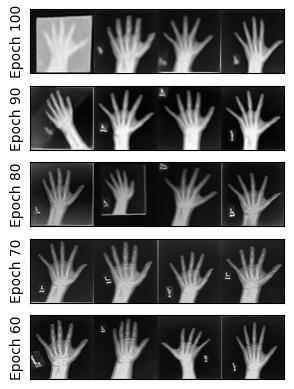

In [27]:
#Visualise the results from the autoencoderKL
# Plot last 5 evaluations
val_samples = np.linspace(n_epochs, val_interval, int(n_epochs / val_interval))
fig, ax = plt.subplots(nrows=5, ncols=1, sharey=True)
for image_n in range(5):
    reconstructions = torch.reshape(intermediary_images[image_n], (image_size * num_example_images, image_size)).T
    ax[image_n].imshow(reconstructions.cpu(), cmap="gray")
    ax[image_n].set_xticks([])
    ax[image_n].set_yticks([])
    ax[image_n].set_ylabel(f"Epoch {val_samples[image_n]:.0f}")

In [29]:
#Define diffusion model and scheduler
unet = DiffusionModelUNet(
    spatial_dims=2,
    in_channels=3,
    out_channels=3,
    num_res_blocks=2,
    num_channels=(128, 256, 512),
    attention_levels=(False, True, True),
    num_head_channels=(0, 256, 512),
)

scheduler = DDPMScheduler(num_train_timesteps=1000, schedule="linear_beta", beta_start=0.0015, beta_end=0.0195)

In [30]:
#Scaling factor
with torch.no_grad():
    with autocast(enabled=True):
        z = autoencoderkl.encode_stage_2_inputs(check_data["image"].to(device))

print(f"Scaling factor set to {1/torch.std(z)}")
scale_factor = 1 / torch.std(z)

Scaling factor set to 0.9193115830421448


In [31]:
inferer = LatentDiffusionInferer(scheduler, scale_factor=scale_factor)

**Train diffusion model**

Epoch 39: 100%|█████████| 125/125 [00:37<00:00,  3.37it/s, loss=0.114]


Epoch 39 val loss: 0.1174


100%|██████████| 1000/1000 [00:20<00:00, 48.37it/s]


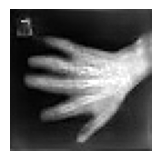

Epoch 79: 100%|█████████| 125/125 [00:37<00:00,  3.37it/s, loss=0.109]


Epoch 79 val loss: 0.1142


100%|██████████| 1000/1000 [00:20<00:00, 48.88it/s]


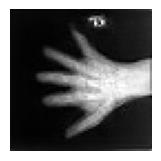

Epoch 119: 100%|████████| 125/125 [00:36<00:00,  3.40it/s, loss=0.111]


Epoch 119 val loss: 0.1196


100%|██████████| 1000/1000 [00:20<00:00, 49.76it/s]


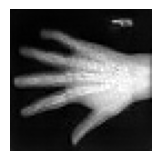

Epoch 159: 100%|████████| 125/125 [00:36<00:00,  3.42it/s, loss=0.102]


Epoch 159 val loss: 0.1068


100%|██████████| 1000/1000 [00:19<00:00, 51.23it/s]


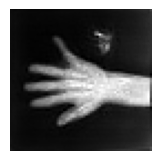

Epoch 199: 100%|████████| 125/125 [00:36<00:00,  3.40it/s, loss=0.103]


Epoch 199 val loss: 0.1001


100%|██████████| 1000/1000 [00:20<00:00, 49.85it/s]


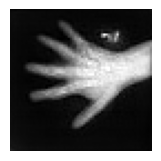

In [32]:
optimizer = torch.optim.Adam(unet.parameters(), lr=1e-4)

unet = unet.to(device)
n_epochs = 200
val_interval = 40
epoch_losses = []
val_losses = []
scaler = GradScaler()

for epoch in range(n_epochs):
    unet.train()
    autoencoderkl.eval()
    epoch_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), ncols=70)
    progress_bar.set_description(f"Epoch {epoch}")
    for step, batch in progress_bar:
        images = batch["image"].to(device)
        optimizer.zero_grad(set_to_none=True)
        with autocast(enabled=True):
            z_mu, z_sigma = autoencoderkl.encode(images)
            z = autoencoderkl.sampling(z_mu, z_sigma)
            noise = torch.randn_like(z).to(device)
            timesteps = torch.randint(0, inferer.scheduler.num_train_timesteps, (z.shape[0],), device=z.device).long()
            noise_pred = inferer(
                inputs=images, diffusion_model=unet, noise=noise, timesteps=timesteps, autoencoder_model=autoencoderkl
            )
            loss = F.mse_loss(noise_pred.float(), noise.float())

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        epoch_loss += loss.item()

        progress_bar.set_postfix({"loss": epoch_loss / (step + 1)})
    epoch_losses.append(epoch_loss / (step + 1))

    if (epoch + 1) % val_interval == 0:
        unet.eval()
        val_loss = 0
        with torch.no_grad():
            for val_step, batch in enumerate(val_loader, start=1):
                images = batch["image"].to(device)

                with autocast(enabled=True):
                    z_mu, z_sigma = autoencoderkl.encode(images)
                    z = autoencoderkl.sampling(z_mu, z_sigma)

                    noise = torch.randn_like(z).to(device)
                    timesteps = torch.randint(
                        0, inferer.scheduler.num_train_timesteps, (z.shape[0],), device=z.device
                    ).long()
                    noise_pred = inferer(
                        inputs=images,
                        diffusion_model=unet,
                        noise=noise,
                        timesteps=timesteps,
                        autoencoder_model=autoencoderkl,
                    )

                    loss = F.mse_loss(noise_pred.float(), noise.float())

                val_loss += loss.item()
        val_loss /= val_step
        val_losses.append(val_loss)
        print(f"Epoch {epoch} val loss: {val_loss:.4f}")

        # Sampling image during training
        z = torch.randn((1, 3, 16, 16))
        z = z.to(device)
        scheduler.set_timesteps(num_inference_steps=1000)
        with autocast(enabled=True):
            decoded = inferer.sample(
                input_noise=z, diffusion_model=unet, scheduler=scheduler, autoencoder_model=autoencoderkl
            )

        plt.figure(figsize=(2, 2))
        plt.style.use("default")
        plt.imshow(decoded[0, 0].detach().cpu(), vmin=0, vmax=1, cmap="gray")
        plt.tight_layout()
        plt.axis("off")
        plt.show()
progress_bar.close()

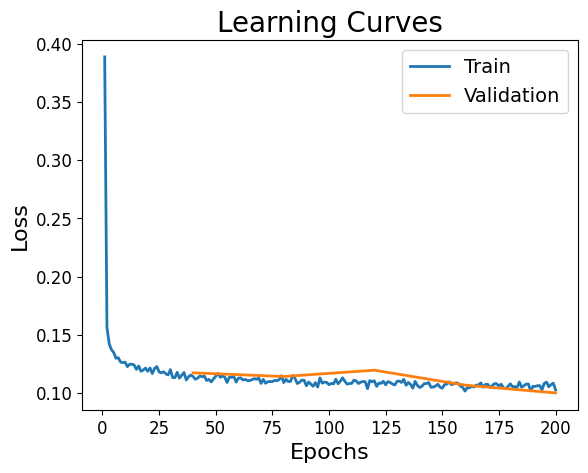

In [33]:
#Plot learning curves
plt.figure()
plt.title("Learning Curves", fontsize=20)
plt.plot(np.linspace(1, n_epochs, n_epochs), epoch_losses, linewidth=2.0, label="Train")
plt.plot(
    np.linspace(val_interval, n_epochs, int(n_epochs / val_interval)), val_losses, linewidth=2.0, label="Validation"
)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend(prop={"size": 14})

In [34]:
#Plotting sampling example
unet.eval()
scheduler.set_timesteps(num_inference_steps=1000)
noise = torch.randn((1, 3, 16, 16))
noise = noise.to(device)

with torch.no_grad():
    image, intermediates = inferer.sample(
        input_noise=noise,
        diffusion_model=unet,
        scheduler=scheduler,
        save_intermediates=True,
        intermediate_steps=100,
        autoencoder_model=autoencoderkl,
    )

100%|██████████| 1000/1000 [00:16<00:00, 59.30it/s]


(-0.5, 639.5, 63.5, -0.5)

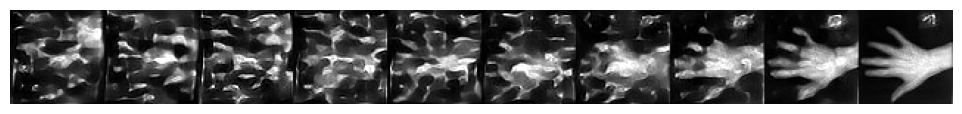

In [35]:
# Decode latent representation of the intermediary images
decoded_images = []
for image in intermediates:
    with torch.no_grad():
        decoded_images.append(image)
plt.figure(figsize=(10, 12))
chain = torch.cat(decoded_images, dim=-1)
plt.style.use("default")
plt.imshow(chain[0, 0].cpu(), vmin=0, vmax=1, cmap="gray")
plt.tight_layout()
plt.axis("off")

In [36]:
#Clean-up data directory
if directory is None:
    shutil.rmtree(root_dir)